# Mapeando el Universo



## Aprendizaje Supervisado

### 01 - Lectura de datos

In [1]:
# Iportamos librerìas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
from sklearn import datasets, linear_model
from sklearn.linear_model import (LinearRegression, SGDClassifier, Ridge, SGDRegressor)
from sklearn.preprocessing import (PolynomialFeatures, MinMaxScaler)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (train_test_split, KFold, GridSearchCV)
from sklearn.metrics import (mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import os
import gc
import sys
import pkg_resources
import warnings
warnings.filterwarnings('ignore')


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-qm36su4m because the default path (/home/lborgnino/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
if 'psutil' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install psutil
if 'scikit-learn' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install scikit-learn
in_colab = 'google.colab' in sys.modules

def Memory():
    """Imprime la cantidad de memoria RAM utilizada por el proceso 
    hasta el momento, en GB"""
    gc.collect()
    process = psutil.Process(os.getpid())
    print('Memoria actual utilizada: %.2f GB' %(process.memory_full_info().rss*1e-9))
    return

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
filename = "./dataset/data_filter.csv"

In [9]:
data = pd.read_csv(filename,index_col=0)

In [10]:
data.describe()

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,subClass_STARFORMING_BROADLINE,subClass_null,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
count,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,...,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000
mean,0.104342,135.548575,184.663017,25.119669,19.486345,17.820442,16.964847,16.554727,16.264905,19.482649,...,0.001363,0.590323,1.665904,0.855595,0.410120,0.289823,1.615551,0.831818,0.386924,0.233235
std,0.053560,74.773948,58.737151,19.010990,0.960267,0.763514,0.675561,0.673814,0.707239,1.157991,...,0.036895,0.491775,0.458326,0.296790,0.097406,0.179993,0.799674,0.352273,0.220364,0.373315
min,-0.006568,0.000000,0.001718,-11.252825,14.226100,13.574420,13.890400,13.758980,12.382540,11.984880,...,0.000000,0.000000,-9.993700,-6.423580,-4.947020,-13.819450,-19.256860,-3.612750,-22.090000,-21.056590
25%,0.066619,83.816160,151.925664,9.675502,18.901570,17.420410,16.635270,16.226100,15.916920,18.858070,...,0.000000,0.000000,1.343030,0.675080,0.373660,0.248440,1.239470,0.639410,0.350710,0.188920
50%,0.097589,131.624900,185.461795,23.769607,19.528360,17.971860,17.157480,16.737970,16.430190,19.460280,...,0.000000,1.000000,1.718690,0.875560,0.422390,0.315140,1.542990,0.843520,0.404890,0.271040
75%,0.136380,181.387900,220.488190,39.551447,20.146590,18.358100,17.474630,17.051040,16.752250,20.062810,...,0.000000,1.000000,1.938110,1.022410,0.463140,0.353350,1.817090,0.995580,0.445390,0.324840
max,1.000208,850.000000,359.997379,70.268882,30.599800,28.401410,25.141300,20.176000,28.553240,41.270800,...,1.000000,1.000000,13.198990,13.050000,9.648550,5.005140,24.066280,19.110600,4.211290,19.374340


In [11]:
data.columns

Index(['z', 'velDisp', 'ra', 'dec', 'subClass', 'modelMag_u', 'modelMag_g',
       'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroMag_u', 'petroMag_g',
       'petroMag_r', 'petroMag_i', 'petroMag_z', 'deVRad_u', 'deVRad_g',
       'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r',
       'expRad_i', 'expRad_z', 'petroRad_u', 'petroRad_g', 'petroRad_r',
       'petroRad_i', 'petroRad_z', 'spiral', 'elliptical', 'uncertain',
       'subClass_AGN', 'subClass_AGN_BROADLINE', 'subClass_BROADLINE',
       'subClass_STARBURST', 'subClass_STARBURST_BROADLINE',
       'subClass_STARFORMING', 'subClass_STARFORMING_BROADLINE',
       'subClass_null', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri',
       'modelColor_iz', 'petroColor_ug', 'petroColor_gr', 'petroColor_ri',
       'petroColor_iz'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608921 entries, 957075158303008768 to 957064712942544896
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   z                               608921 non-null  float64
 1   velDisp                         608921 non-null  float64
 2   ra                              608921 non-null  float64
 3   dec                             608921 non-null  float64
 4   subClass                        249461 non-null  object 
 5   modelMag_u                      608921 non-null  float64
 6   modelMag_g                      608921 non-null  float64
 7   modelMag_r                      608921 non-null  float64
 8   modelMag_i                      608921 non-null  float64
 9   modelMag_z                      608921 non-null  float64
 10  petroMag_u                      608921 non-null  float64
 11  petroMag_g                      608921 non-null  

In [13]:
from fail_safe_parallel_memory_reduction import Reducer

reducer = Reducer(n_jobs=1)
data = reducer.reduce(data)

ModuleNotFoundError: No module named 'fastprogress'

### 02 - Set de datos

In [14]:
#-- Jugar con esta lista, agregar o sacar o cambiar las columnas.

# Set de 21 variables que incluyen las magnitudes y colores model_mag
filter_col_01=[];
filter_col_01.extend([col for col in data if col.startswith(('modelMag', 'modelColor','deVRad','expRad','velDisp', 'z'))])

# Set de 21 variables que incluyen las magnitudes y colores petro_mag
filter_col_02=[]
filter_col_02.extend([col for col in data if col.startswith(('petroMag', 'petroColor','petroRad','velDisp', 'z'))])

## Set de  11 variables. Es un set reducido respecto del set filter_col_01
filter_col_03=[];
filter_col_03.extend([col for col in data if col.startswith(('modelMag', 'modelColor','velDisp', 'z'))])

# Set de 12 variables diferentes entre los distintos sistemas de magnitudes
filter_col_04=[]
filter_col_04=[ 'z','petroColor_gr', 'modelColor_ri', 'modelColor_gr','petroMag_r','petroMag_g','petroMag_u',
                    'modelMag_i','modelMag_g','modelMag_u','modelMag_r','velDisp']


In [15]:
print(filter_col_01)

['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']


In [16]:
print(filter_col_02)

['z', 'velDisp', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z', 'petroColor_ug', 'petroColor_gr', 'petroColor_ri', 'petroColor_iz']


In [17]:
print(filter_col_03)

['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']


In [18]:
print(filter_col_04)

['z', 'petroColor_gr', 'modelColor_ri', 'modelColor_gr', 'petroMag_r', 'petroMag_g', 'petroMag_u', 'modelMag_i', 'modelMag_g', 'modelMag_u', 'modelMag_r', 'velDisp']


### 03- Clasificación del tipo morfológico de galaxias
  * Implementar los modelos random forest y redes neuronales para clasificar las galaxias en tipo Elípticas y Espirales e Irregulares
    + Utilizar al menos dos subconjuntos diferentes de variables (uno puede ser el mejor conjunto que les resultó del práctico anterior)
    + Realizar una búsqueda en grilla de los mejores parámetros de los modelos empleados.
    + Comparar la performance con los modelos de:
        * perceptrón,
        * regresión logística,
        * vecinos más cercanos 
        * o el que hayan utilizado en el práctico anterior.

In [19]:
# Subsets según el tipo morfológico de las galaxias: data['morfologia']
data['morfologia'] = 'uncertain'
data.loc[data['elliptical']==1, 'morfologia'] = 'elliptical'
data.loc[data['spiral']==1, 'morfologia'] = 'spiral'

In [20]:
data['morfologia']

specObjID
957075158303008768     uncertain
957066087332079616     uncertain
957065537576265728        spiral
957066911965800448    elliptical
693629150375733248     uncertain
                         ...    
957075708058822656     uncertain
957077632204171264     uncertain
957077357326264320        spiral
957066637087893504        spiral
957064712942544896     uncertain
Name: morfologia, Length: 608921, dtype: object

### 03-1. Modelo: RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [22]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 200, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

### 03-1-A. Set de datos 1 : filter_col_01

In [24]:
# Set de datos 1: 
print(filter_col_01)

['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']


In [25]:
X, y = data[filter_col_01[1:]], data['morfologia']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(len(X_train))

X_train_reduced = X_train[0:10000]
y_train_reduced = y_train[0:10000]

print(len(X_train_reduced))

487136
10000


In [26]:
model_subset_01 = RandomForestClassifier()

rf_random_01 = GridSearchCV(model_subset_01, random_grid, n_jobs=-1 , verbose=10 )

rf_random_01.fit(X_train_reduced,y_train_reduced)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 200]},
             verbose=10)

In [27]:
best_params_01= rf_random_01.best_params_
print(best_params_01)

{'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [28]:
best_estimator_rf_01 = rf_random_01.best_estimator_

In [29]:
y_train_pred_01 = best_estimator_rf_01.predict(X_train_reduced)
y_test_pred_01 = best_estimator_rf_01.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred_01 == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred_01 == y_test)/len(y_test))

Train Accuracy:  0.9805
Test Accuracy:  0.7287514882785237


In [30]:
best_estimator_01_fit= best_estimator_rf_01.fit(X_train, y_train)

In [31]:
y_train_pred_01_fit = best_estimator_01_fit.predict(X_train_reduced)
y_test_pred_01_fit = best_estimator_01_fit.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred_01_fit == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred_01_fit == y_test)/len(y_test))

Train Accuracy:  0.9812
Test Accuracy:  0.7520466395697335


### 03-1-B. Set de datos 4 : filter_col_04

In [32]:
# Set de datos 4: filter_col_04
print(filter_col_04)

['z', 'petroColor_gr', 'modelColor_ri', 'modelColor_gr', 'petroMag_r', 'petroMag_g', 'petroMag_u', 'modelMag_i', 'modelMag_g', 'modelMag_u', 'modelMag_r', 'velDisp']


In [33]:
X, y = data[filter_col_04[1:]], data['morfologia']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(len(X_train))
X_train_reduced = X_train[0:10000]
y_train_reduced = y_train[0:10000]

487136


In [34]:
model_subset_04 = RandomForestClassifier()

rf_random_04 = GridSearchCV(model_subset_04, random_grid, n_jobs=-1 , verbose=10 )

rf_random_04.fit(X_train_reduced,y_train_reduced)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  5

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 200]},
             verbose=10)

In [35]:
best_params_04= rf_random_04.best_params_
print(best_params_04)

{'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [36]:
best_estimator_rf_04 = rf_random_04.best_estimator_

In [37]:
y_train_pred_04 = best_estimator_rf_04.predict(X_train_reduced)
y_test_pred_04 = best_estimator_rf_04.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred_04 == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred_04 == y_test)/len(y_test))

Train Accuracy:  0.9835
Test Accuracy:  0.6858233772632097


In [38]:
best_estimator_04_fit= best_estimator_rf_04.fit(X_train, y_train)

In [39]:
y_train_pred_04_fit = best_estimator_04_fit.predict(X_train_reduced)
y_test_pred_04_fit = best_estimator_04_fit.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred_04_fit == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred_04_fit == y_test)/len(y_test))

Train Accuracy:  0.9845
Test Accuracy:  0.7078211602414091


### 04-2. Modelo: Red neuronal

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

### 03-2-A. Set de datos 1 : filter_col_01

In [42]:
X, y = data[filter_col_01[1:]], data['morfologia']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(len(X_train))

X_train_reduced = X_train[0:10000]
y_train_reduced = y_train[0:10000]

print(len(X_train_reduced))

487136
10000


In [43]:
clf_01 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf_01.fit(X_train_reduced, y_train_reduced)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  6.9min finished


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=10)

In [44]:
print(clf_01.best_params_)

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [45]:
best_random_mlpc_01 = clf_01.best_estimator_
y_train_pred_01 = best_random_mlpc_01.predict(X_train_reduced)
y_test_pred_01 = best_random_mlpc_01.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred_01 == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred_01 == y_test)/len(y_test))

Train Accuracy:  0.7227
Test Accuracy:  0.7140041877078458


In [46]:
best_random_mlpc_01.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.05, max_iter=100)

In [47]:
y_train_pred_01_fit = best_random_mlpc_01.predict(X_train_reduced)
y_test_pred_01_fit = best_random_mlpc_01.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred_01_fit == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred_01_fit == y_test)/len(y_test))

Train Accuracy:  0.7292
Test Accuracy:  0.7297450424929178


### 03-2-B. Set de datos 4 : filter_col_04

In [48]:
X, y = data[filter_col_04[1:]], data['morfologia']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(len(X_train))

X_train_reduced = X_train[0:10000]
y_train_reduced = y_train[0:10000]

print(len(X_train_reduced))

487136
10000


In [49]:
clf_04 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf_04.fit(X_train_reduced, y_train_reduced)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.7min finished


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=10)

In [50]:
print(clf_04.best_params_)

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [52]:
best_random_mlpc_04 = clf_04.best_estimator_
y_train_pred_04 = best_random_mlpc_04.predict(X_train_reduced)
y_test_pred_04 = best_random_mlpc_04.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred_04 == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred_04 == y_test)/len(y_test))

Train Accuracy:  0.6498
Test Accuracy:  0.6525844726362031


In [53]:
best_random_mlpc_04.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              max_iter=100)

In [54]:
y_train_pred_04_fit = best_random_mlpc_04.predict(X_train_reduced)
y_test_pred_04_fit = best_random_mlpc_04.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred_04_fit == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred_04_fit == y_test)/len(y_test))

Train Accuracy:  0.6838
Test Accuracy:  0.6900767746438395


### 04-3. Comparación: respecto a los modelos anteriores

## **NOTAS:**
#### Modelos implementados para clasificar las galaxias en tipo Elípticas y Espirales e Irregulares.

+ **SGDC** (trabajo anterior):   
    + subset_01: Test accuracy: 0.7027
+ **PERCEPTRÓN** (trabajo anterior):   
    + subset_01: Test accuracy: 0.7456
* **RF Tree**
    + subset_01: Test accuracy: 0.7512  
    + subset_04: Test accuracy: 0.7087
+ **MLPC**
    + subset_01:  Test accuracy: 0.7396
    + subset_04:  Test accuracy: 0.6982
        
CONCLUSIONES    
* Los resultados obtenidos para el subset_01 con los modelos corridos en este trabajo, muestran una mejoría respecto al **modelo SGDC** utilizado en el práctico anterior. 
* El mejor modelo es del **RF Tree** ya que con él obtenemos el mejor valor de accuracy.

### 05- Determinación del _redshift_ de las galaxias

  * Implementar los modelos de random forest, multi-layer perceptron y/o stochastic gradient descent para determinar el _redshift_ de las galaxias a partir de las propiedades fotométricas.
  
    + Utilizar al menos dos subconjuntos diferentes de variables (uno puede ser el mejor conjunto que les resultó del práctico anterior)
    + Determinar cuales son los parámetros de los algoritmos más importantes y realizar una búsqueda en grilla de los mejores parámetros de los modelos empleandos.
    + Elijan un métrica para evaluar el rendimiento de los métodos.
    
**NOTA**: No olviden realizar la división del dataset en un conjunto de entrenamiento y de test.
    
   

### 05-1. Modelo: RandomForest

In [55]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 200, num = 2)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 2)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [56]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

### 05-1-A. Set de datos 1 : filter_col_01

In [57]:
# Set de datos 1: 
print(filter_col_01)

['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']


In [58]:
X, y = data[filter_col_01[1:]], data['z']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(len(X_train))

X_train_reduced = X_train[0:10000]
y_train_reduced = y_train[0:10000]

print(len(X_train_reduced))

487136
10000


In [59]:
from sklearn.ensemble import RandomForestRegressor

model_subset_01 = RandomForestRegressor()

rf_random_01 = GridSearchCV(model_subset_01, random_grid, n_jobs=-1 , verbose=10 )

rf_random_01.fit(X_train_reduced,y_train_reduced)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 15

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 200]},
             verbose=10)

In [60]:
best_params_01= rf_random_01.best_params_
print(best_params_01)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [61]:
best_estimator_rf_01 = rf_random_01.best_estimator_

In [62]:
y_train_pred_01 = best_estimator_rf_01.predict(X_train_reduced)
y_test_pred_01 = best_estimator_rf_01.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_pred_01, y_train_reduced)
test_error = mean_squared_error(y_test_pred_01, y_test)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.00019
Test error: 0.00057


In [65]:
best_estimator_01_fit= best_estimator_rf_01.fit(X_train, y_train)

In [67]:
y_train_pred_01_fit = best_estimator_01_fit.predict(X_train_reduced)
y_test_pred_01_fit = best_estimator_01_fit.predict(X_test)

train_error = mean_squared_error(y_train_pred_01_fit, y_train_reduced)
test_error = mean_squared_error(y_test_pred_01_fit, y_test)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.00015
Test error: 0.00045


### 05-1-B. Set de datos 4 : filter_col_04

In [68]:
# Set de datos 4: 
print(filter_col_04)

['z', 'petroColor_gr', 'modelColor_ri', 'modelColor_gr', 'petroMag_r', 'petroMag_g', 'petroMag_u', 'modelMag_i', 'modelMag_g', 'modelMag_u', 'modelMag_r', 'velDisp']


In [69]:
X, y = data[filter_col_04[1:]], data['z']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(len(X_train))

X_train_reduced = X_train[0:10000]
y_train_reduced = y_train[0:10000]

print(len(X_train_reduced))

487136
10000


In [70]:
model_subset_04 = RandomForestRegressor()

rf_random_04 = GridSearchCV(model_subset_04, random_grid, n_jobs=-1 , verbose=10 )

rf_random_04.fit(X_train_reduced,y_train_reduced)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  8

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 200]},
             verbose=10)

In [71]:
best_params_04= rf_random_04.best_params_
print(best_params_04)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}


In [72]:
best_estimator_rf_04 = rf_random_04.best_estimator_

In [73]:
y_train_pred_04 = best_estimator_rf_04.predict(X_train_reduced)
y_test_pred_04 = best_estimator_rf_04.predict(X_test)

train_error = mean_squared_error(y_train_pred_04, y_train_reduced)
test_error = mean_squared_error(y_test_pred_04, y_test)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.00023
Test error: 0.00066


In [74]:
best_estimator_04_fit= best_estimator_rf_04.fit(X_train, y_train)

In [75]:
y_train_pred_04_fit = best_estimator_04_fit.predict(X_train_reduced)
y_test_pred_04_fit = best_estimator_04_fit.predict(X_test)

train_error = mean_squared_error(y_train_pred_04_fit, y_train_reduced)
test_error = mean_squared_error(y_test_pred_04_fit, y_test)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.00018
Test error: 0.00055


### 05-2. Modelo: Red neuronal

In [76]:
mlp = MLPRegressor(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

### 05-2-A. Set de datos 1 : filter_col_01

In [77]:
#X, y = data[filter_col_01[1:]], data['z']

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

#print(len(X_train))

#X_train_reduced = X_train[0:10000]
#y_train_reduced = y_train[0:10000]

X, y = data[filter_col_01[1:]][0:13000], data['z'][0:13000]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print(len(X_train_scaled))

10400


In [78]:
clf_01 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf_01.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.7min finished


GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=10)

In [79]:
print(clf_01.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [81]:
best_random_mlpc_01 = clf_01.best_estimator_

y_train_pred_01 = best_random_mlpc_01.predict(X_train_scaled)

y_test_pred_01 = best_random_mlpc_01.predict(X_test_scaled)

train_error = mean_squared_error(y_train_pred_01, y_train)
test_error = mean_squared_error(y_test_pred_01, y_test)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.00065
Test error: 0.00093


In [82]:
best_random_mlpc_01.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(50, 100, 50), max_iter=100)

In [83]:
y_train_pred_01_fit = best_random_mlpc_01.predict(X_train_scaled)
y_test_pred_01_fit = best_random_mlpc_01.predict(X_test_scaled)

train_error = mean_squared_error(y_train_pred_01_fit, y_train)
test_error = mean_squared_error(y_test_pred_01_fit, y_test)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.00067
Test error: 0.00096


In [ ]:
#def rmsle(y_pred, y_test) : 
    #clip zero values
#    assert len(y_test) == len(y_pred)
#    return np.sqrt(np.mean((np.log(list(np.asarray(y_pred).clip(min=0) + 1)) 
#                            - np.log(list(np.asarray(y_test).clip(min=0) + 1)))**2))

In [ ]:
#print(rmsle(y_test_pred_01_fit, y_test))

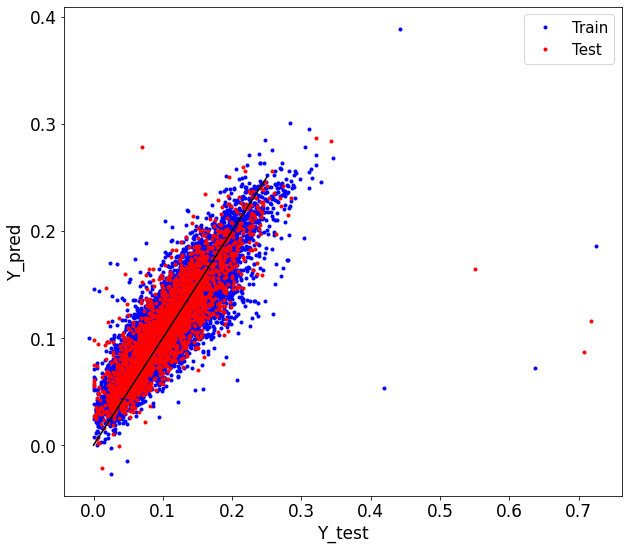

In [84]:
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,9))
ax.plot(y_train, y_train_pred_01_fit, 'b.', label='Train')

ax.plot(y_test, y_test_pred_01_fit, 'r.', label='Test')
ax.plot([0,0.25], [0,0.25], 'k-')
ax.set_xlabel('Y_test', fontsize=17)
ax.set_ylabel('Y_pred', fontsize=17)
ax.tick_params(axis='both',  labelsize=17)
ax.legend(fontsize=15)

### 05-2-B. Set de datos 4 : filter_col_04

In [85]:
#X, y = data[filter_col_04[1:]], data['z']

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

#print(len(X_train))

#X_train_reduced = X_train[0:10000]
#y_train_reduced = y_train[0:10000]

#print(len(X_train_reduced))

X, y = data[filter_col_04[1:]][0:13000], data['z'][0:13000]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print(len(X_train_scaled))

10400


In [86]:
clf_04 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf_04.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.9min finished


GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=10)

In [87]:
print(clf_04.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [88]:
best_random_mlpc_04 = clf_04.best_estimator_
y_train_pred_04 = best_random_mlpc_04.predict(X_train_scaled)
y_test_pred_04 = best_random_mlpc_04.predict(X_test_scaled)

train_error = mean_squared_error(y_train_pred_04, y_train)
test_error = mean_squared_error(y_test_pred_04, y_test)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.00083
Test error: 0.0011


In [89]:
best_random_mlpc_04.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(50, 100, 50), max_iter=100)

In [90]:
y_train_pred_04_fit = best_random_mlpc_04.predict(X_train_scaled)
y_test_pred_04_fit = best_random_mlpc_04.predict(X_test_scaled)

train_error = mean_squared_error(y_train_pred_04_fit, y_train)
test_error = mean_squared_error(y_test_pred_04_fit, y_test)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.00077
Test error: 0.001


In [91]:
#print(rmsle(y_test_pred_04_fit, y_test))

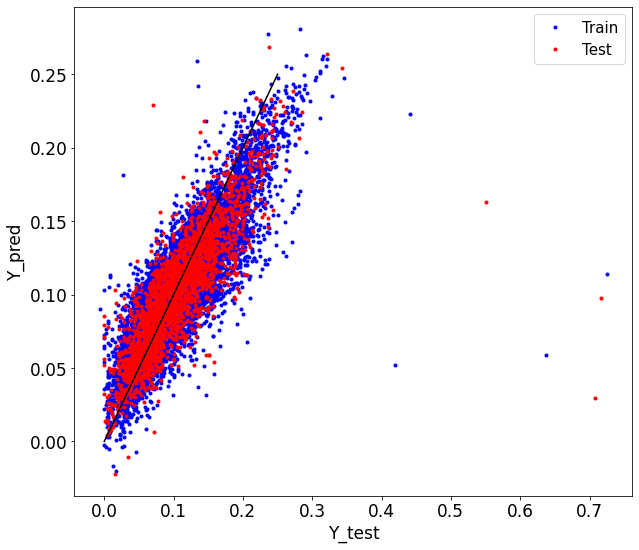

In [92]:
f, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,9))
ax.plot(y_train, y_train_pred_04_fit, 'b.', label='Train')

ax.plot(y_test, y_test_pred_04_fit, 'r.', label='Test')
ax.plot([0,0.25], [0,0.25], 'k-')
ax.set_xlabel('Y_test', fontsize=17)
ax.set_ylabel('Y_pred', fontsize=17)
ax.tick_params(axis='both',  labelsize=17)
ax.legend(fontsize=15)

## **NOTAS:** 
#### Modelos implementados con una búsqueda en grilla, para determinar el redshift de las galaxias a partir de las propiedades fotométricas.

* **RF Tree**
    + subset_01: MSE: 0.00045
    + subset_04: MSE: 0.00055
+ **MLPC**
    + subset_01:  MSE: 0.00096
    + subset_04:  MSE: 0.001 
        
CONCLUSIONES    
* Los mejores resultados se observan para el modelo RandomForest con el subset01